In [26]:
import pickle
import cPickle
import numpy
import pandas as pd

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "r")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "r")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, 
                                                                  authors, test_size=0.1, random_state=42)


    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print "no. of Chris training emails:", sum(labels_train)
    print "no. of Sara training emails:", len(labels_train)-sum(labels_train)
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [2]:
#!/usr/bin/python

"""
    this is the code to accompany the Lesson 2 (SVM) mini-project
    use an SVM to identify emails from the Enron corpus by their authors
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

#Udacity gave me the 'rbf' and C=10,000 code
model = AdaBoostClassifier(n_estimators=250)

#Udacity suggested this
#features_train = features_train[:len(features_train)/100] 
#labels_train = labels_train[:len(labels_train)/100] 


t0 = time()
model.fit(features_train, labels_train)
print "model train time", time() - t0

t1 = time()
pred = model.predict(features_test)
print "model prediction time", time() - t1

acc = accuracy_score(labels_test, pred)
print acc

#print "Random numbers la la la"
#print pred[10]
#print pred[26]
#print pred[50]


#########################################################



no. of Chris training emails: 7936
no. of Sara training emails: 7884
model train time 29.0900001526
model prediction time 0.126999855042
0.9795221843
Random numbers la la la
1
0
1


In [3]:
predList = pred.tolist()

In [4]:
predList.count(1)

887

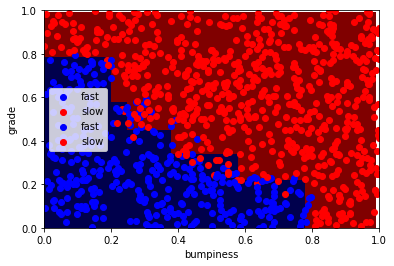

accuracy:
0.928


In [24]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=13)

clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print "accuracy:"
print acc


try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
